<a href="https://colab.research.google.com/github/byrneap23/FinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import random
import matplotlib.pyplot as plt

In [26]:
# The user is given the probability to achieve within 1%
int_target = random.randint(2, 100)
print(f"Your target percentage to get within 1% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
d1_value = int(input("Enter what die number you want on the first die (this can't be changed after entered): "))
d2_value = int(input("Enter what die number you want on the second die (this can't be changed after entered): "))

# Fixed number of Monte Carlo trials
numTrials = 10000

Your target percentage to get within 1% of is 40%.
Enter what die number you want on the first die (this can't be changed after entered): 6
Enter what die number you want on the second die (this can't be changed after entered): 6



Attempt #1
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 24
The probability you achieved with your inputs was: 49.85%.
Sorry, your probability of 49.85% is not within 1% of the target (40%).
Trying again

Attempt #2
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 20
The probability you achieved with your inputs was: 43.63%.
Sorry, your probability of 43.63% is not within 1% of the target (40%).
Trying again

Attempt #3
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 19
The probability you achieved with your inputs was: 41.01%.
Sorry, your probability of 41.01% is not within 1% of the target (40%).
Trying again

Attempt #4
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 19
The probability you achieved wit

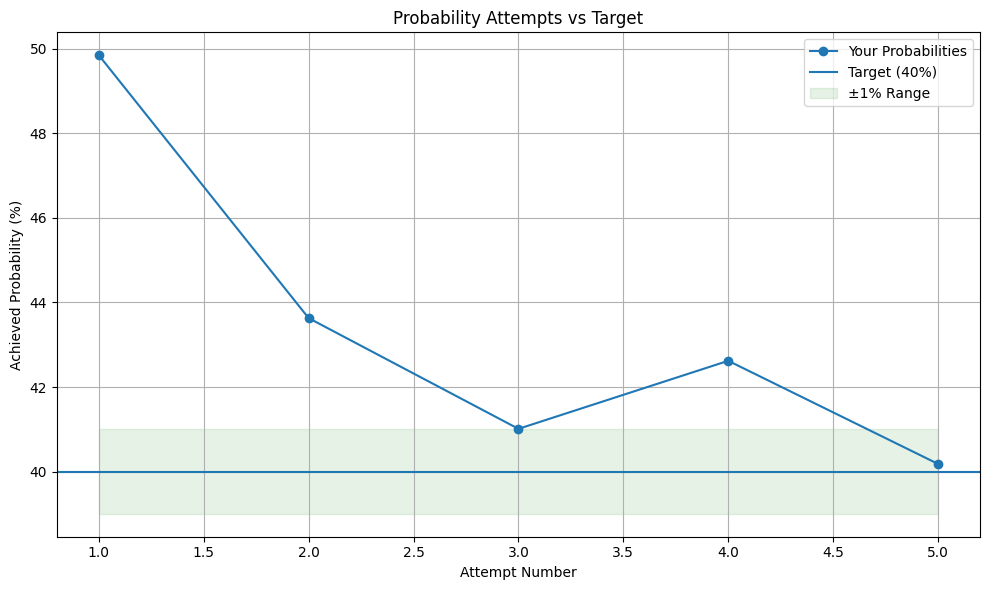

In [27]:
# Die rolling function (sides passed in)
def rollDie(sides):
    return random.randint(1, sides)

# Simulation function
def MonteProb(rolls, d1_value, d2_value, sides):
    numwins = 0.0
    wins_per_trial = []

    for i in range(numTrials):
        success = False
        for j in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value:
                numwins += 1
                break


    prob = (numwins / numTrials) * 100
    return prob

# Track attempt number and probabilities
attempt = 1
prob_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    sides = int(input("Please enter the number of sides you would like on the die: "))
    rolls = int(input("Now, enter the total number of rolls you want to happen: "))

    prob = MonteProb(rolls, d1_value, d2_value, sides)
    prob_history.append(prob)

    print(f"The probability you achieved with your inputs was: {prob:.2f}%.")

    if abs(prob - target) <= 1:
        print(f"Congrats! Your probability of {prob:.2f}% is within 1% of the target ({target}%)!")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 1% of the target ({target}%).")
        print("Trying again")
        attempt += 1

# Plotting after success
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), prob_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, linestyle='-', label=f"Target ({target}%)")
plt.fill_between(range(1, attempt + 1), target - 1, target + 1, color='green', alpha=0.1, label="±1% Range")

plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



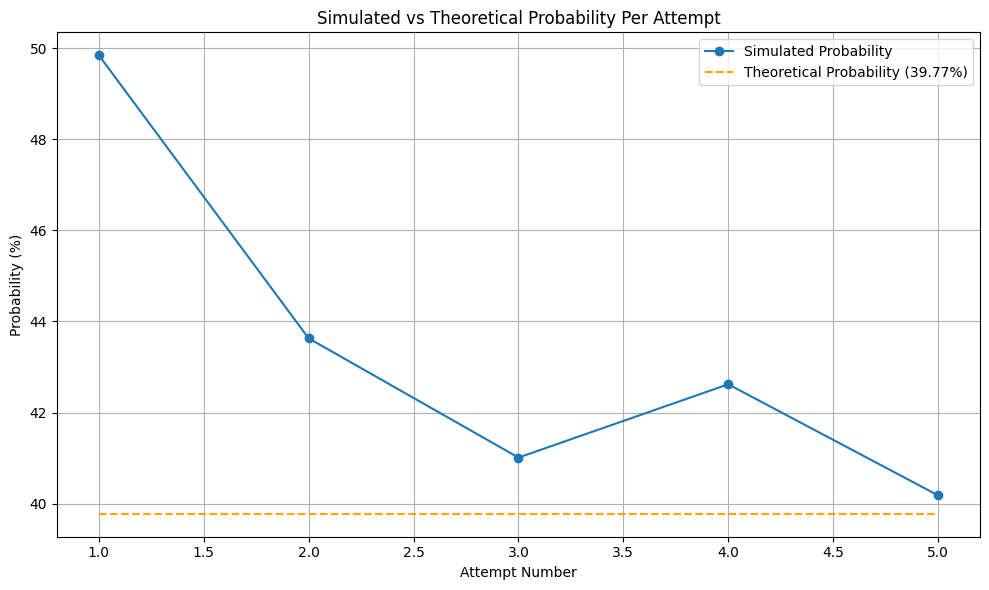

In [28]:
actual_prob_per_trial = (1 - (1 - (1 / sides**2)) ** rolls) * 100
actual_probs = [actual_prob_per_trial] * attempt  # flat line for comparison

plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), prob_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_probs, linestyle='--', color='orange', label=f"Theoretical Probability ({actual_prob_per_trial:.2f}%)")

plt.title("Simulated vs Theoretical Probability Per Attempt")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Your target percentage to get within 3% of is 65%.
Enter what die number you want on the first die (this can't be changed after entered): 6
Enter what die number you want on the second die (this can't be changed after entered): 6

Attempt #1
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 24
Simulated Probability: 47.00%
Theoretical Probability: 49.14%
❌ Sorry, your probability of 47.00% is not within 3% of the target (65%).
🔁 Trying again...

Attempt #2
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 30
Simulated Probability: 61.00%
Theoretical Probability: 57.05%
❌ Sorry, your probability of 61.00% is not within 3% of the target (65%).
🔁 Trying again...

Attempt #3
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 35
Simulated Probability: 59.00%
Theoretical Probability: 62.69

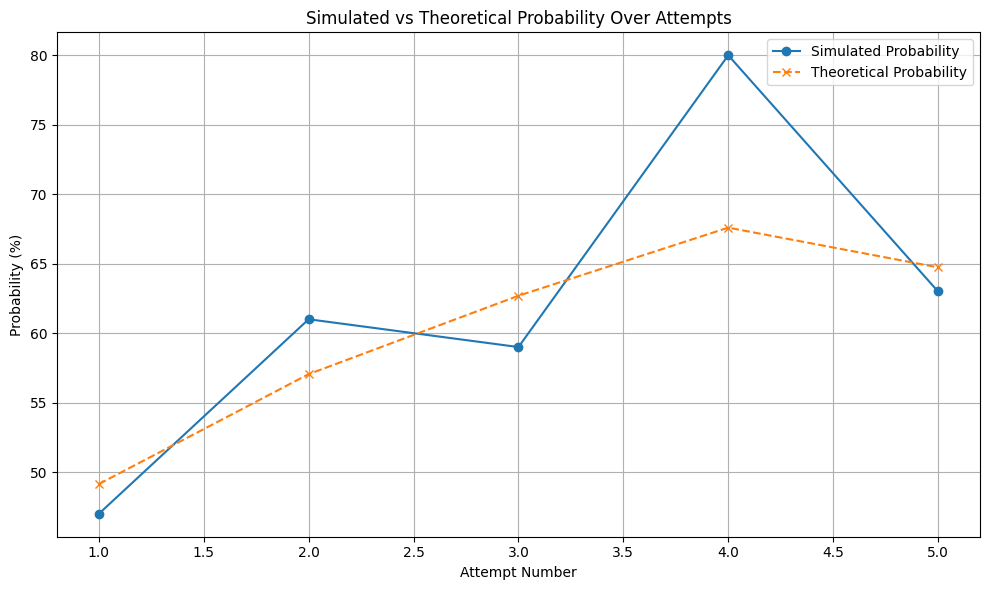

In [31]:
import random
import matplotlib.pyplot as plt

# The user is given the probability to achieve within 3%
int_target = random.randint(1, 100)
print(f"Your target percentage to get within 3% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
d1_value = int(input("Enter what die number you want on the first die (this can't be changed after entered): "))
d2_value = int(input("Enter what die number you want on the second die (this can't be changed after entered): "))

# Fixed number of Monte Carlo trials
numTrials = 100

# Die rolling function
def rollDie(sides):
    return random.randint(1, sides)

# Simulation function: also returns trial-wise success list
def MonteProb(rolls, d1_value, d2_value, sides):
    numwins = 0.0
    wins_per_trial = []

    for i in range(numTrials):
        success = False
        for j in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value:
                numwins += 1
                success = True
                break
        wins_per_trial.append(1 if success else 0)

    prob = (numwins / numTrials) * 100
    return prob, wins_per_trial

# Function to calculate actual theoretical probability
def actual_probability(rolls, sides):
    p_match = (1 / sides) * (1 / sides)  # chance for one roll
    actual = 1 - (1 - p_match) ** rolls  # chance of at least one match
    return actual * 100

# Track attempt number, simulated and actual probabilities
attempt = 1
simulated_history = []
actual_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    sides = int(input("Please enter the number of sides you would like on the die: "))
    rolls = int(input("Now, enter the total number of rolls you want to happen: "))

    prob, last_wins_per_trial = MonteProb(rolls, d1_value, d2_value, sides)
    actual_prob = actual_probability(rolls, sides)

    simulated_history.append(prob)
    actual_history.append(actual_prob)

    print(f"Simulated Probability: {prob:.2f}%")
    print(f"Theoretical Probability: {actual_prob:.2f}%")

    if abs(prob - target) <= 3:
        print(f"Congrats! Your probability of {prob:.2f}% is within 3% of the target ({target}%)!")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 3% of the target ({target}%).")
        print("Trying again...")
        attempt += 1

# Line Graph: Simulated vs Actual Probability
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_history, marker='x', linestyle='--', label="Theoretical Probability")
plt.title("Simulated vs Theoretical Probability Over Attempts")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
